<a href="https://colab.research.google.com/github/sean111501/Ray-Guy-Award-Winner-Project/blob/main/Final_Resume_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title
What It Takes to Win the Ray Guy Award: A Data Science Approach to Elite NCAA Punting
## Objective
This project analyzes NCAA punting data to identify the performance metrics that best predict winners of the Ray Guy Award. The goal is to determine whether punting **consistency**, measured through average yards per punt and percentage of punts inside the 20-yard line, is the defining trait of elite collegiate punters.
## Why it matters in football
Field position is one of the most essential hidden factors in football success. When an offense fails to convert, the punter directly influences how far the opposing team must travel to score. Elite punters consistently flip the field while limiting touchbacks and maximizing placement inside the 20-yard line, creating a measurable advantage for their defense.
## Project Motivation
As a former high school and collegiate punter, I was always interested in how punting performance translates into national recognition. I often noticed that highly skilled punters did not always win the Ray Guy Award, which raised a key question:
**What statistical profile truly defines an award-winning punter?**
This project combines my football background with data science techniques to evaluate that question objectively.
## Key Findings
The analysis shows that **consistency-driven performance metrics**, notably average yards per punt and the percentage of punts inside the 20-yard line, are the strongest indicators of the Ray Guy Award. While total volume and longest punt contribute, they are less predictive than repeatable field-position efficiency.


# **Getting the data**

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
csv_directory = '/content/drive/MyDrive/Football Resume Data'
all_csv_files = glob.glob(os.path.join(csv_directory, "*.csv"))

dfs = []

for file in all_csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

data = pd.concat(dfs, ignore_index=True)
data.to_csv('combined_output.csv', index=False)

# **Cleaning and Performing Explotaory Data Analysis**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159385 entries, 0 to 1159384
Data columns (total 9 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Season      1159385 non-null  int64  
 1   PlayerId    1159385 non-null  int64  
 2   Player      1159385 non-null  object 
 3   Position    1159385 non-null  object 
 4   Team        1159385 non-null  object 
 5   Conference  1159385 non-null  object 
 6   Category    1159385 non-null  object 
 7   StatType    1159385 non-null  object 
 8   Stat        1159385 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 79.6+ MB


In [ ]:
data = data.dropna()

data = data[data['Category'] == 'punting'].copy()

data.loc[data['StatType'] == 'In 20', 'StatType'] = 'Inside 20'
data.loc[data['StatType'] == 'LONG', 'StatType'] = 'Long'
data.loc[data['StatType'] == 'NO', 'StatType'] = 'Number of punts'
data.loc[data['StatType'] == 'TB', 'StatType'] = 'Touchbacks'
data.loc[data['StatType'] == 'YDS', 'StatType'] = 'Total yards'


new_data = ( data.pivot_table(index=['Season', 'PlayerId', 'Player', 'Team', 'Conference'],
                   columns='StatType', values='Stat', aggfunc='first')
    .reset_index()
)
new_data['Average'] = round(new_data['Total yards'] / new_data['Number of punts'], 2)
new_data['Percentage_Inside_20'] = round(new_data['Inside 20'] / new_data['Number of punts'] * 100, 2)

new_data = new_data.drop(columns=['ypp', 'YPP'], errors='ignore')
new_data

StatType,Season,PlayerId,Player,Team,Conference,Inside 20,Long,Number of punts,Total yards,Touchbacks,Average,Percentage_Inside_20
0,2009,123339,Ryan Donahue,Iowa,Big Ten,0.0,73.0,57.0,2352.0,0.0,41.26,0.00
1,2009,169390,Tony Pike,Cincinnati,Big East,0.0,21.0,1.0,21.0,0.0,21.00,0.00
2,2009,170296,John Thomas Shepherd,Rice,Conference USA,0.0,49.0,2.0,79.0,0.0,39.50,0.00
3,2009,170586,Dan LeFevour,Central Michigan,Mid-American,0.0,42.0,3.0,97.0,0.0,32.33,0.00
4,2009,170780,Keegan Peterson,Florida Atlantic,Sun Belt,0.0,35.0,3.0,93.0,0.0,31.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
4199,2024,5231097,Donovan Warren,Jackson State,SWAC,1.0,38.0,1.0,38.0,0.0,38.00,100.00
4200,2024,5231327,Elijah Gorman,Alcorn State,SWAC,5.0,52.0,26.0,976.0,0.0,37.54,19.23
4201,2024,5232141,Jeremy Ramirez,Texas Southern,SWAC,17.0,71.0,44.0,1662.0,2.0,37.77,38.64
4202,2024,5232457,Emiliano Salazar,San Diego,Pioneer,0.0,41.0,1.0,41.0,0.0,41.00,0.00


### Select the Ray Guy award winners

In [ ]:
winners_dict = {
    2024: "Eddie Czaplicki",
    2023: "Tory Taylor",
    2022: "Adam Korsak",
    2021: "Matt Araiza",
    2019: "Max Duffy",
    2018: "Braden Mann",
    2017: "Michael Dickson",
    2016: "Mitch Wishnowsky",
    2015: "Tom Hackett",
    2014: "Tom Hackett",
    2013: "Tom Hornsey",
    2012: "Ryan Allen",
    2011: "Ryan Allen",
    2010: "Chas Henry",
    2009: "Drew Butler"
}

new_data['Winner'] = new_data.apply(
    lambda x: 1 if winners_dict.get(x['Season']) == x['Player'] else 0,
    axis = 1
)

#### As shown above, I created a dictionary of all Ray Guy Award winners from previous years and added it to the dataset as a new column.


### Restricting Data to only FBS Conferences

#### I restricted the dataset to FBS conferences only, as they are the only conferences that can win the Ray Guy Award.

In [ ]:
FBS_conferences = ['American Athletic', 'ACC', 'Big 12', 'Big Ten',
                   'Conference USA', 'FBS Independent', 'Mid-American',
                   'Mountain West', 'Pac-12', 'SEC', 'Sun Belt']
new_data = new_data[new_data['Conference'].isin(FBS_conferences)]

### Checking for outliers

<Axes: xlabel='Number of punts', ylabel='Count'>

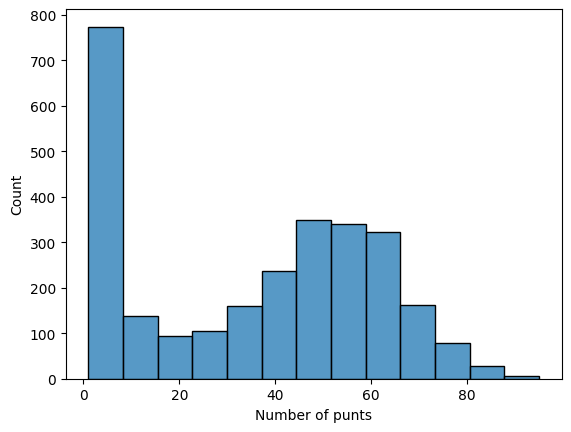

In [ ]:
sns.histplot(x = 'Number of punts', data = new_data)

<Axes: xlabel='Average', ylabel='Count'>

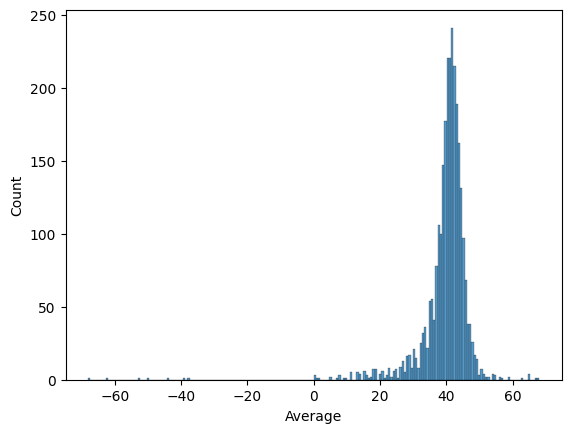

In [ ]:
sns.histplot(x = 'Average', data = new_data)

### Ray Guy Award Winners by Number of Punts

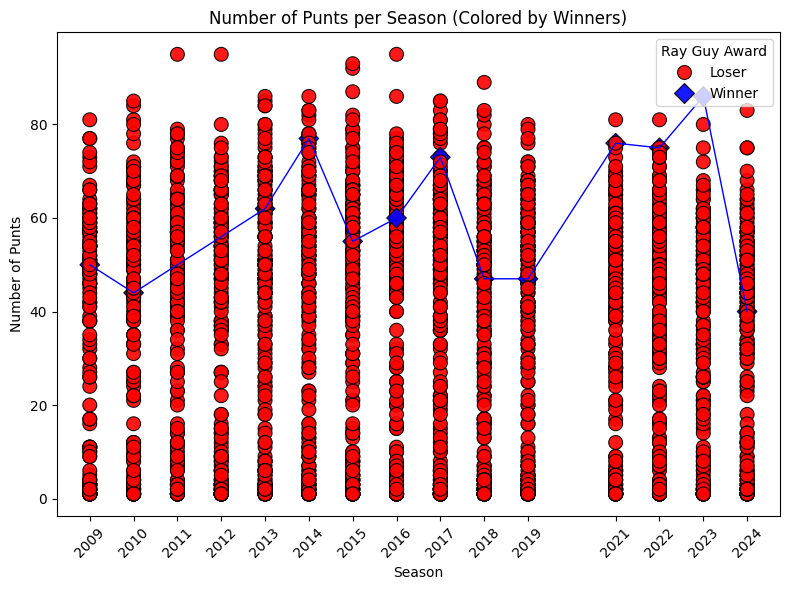

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=new_data,
    x='Season',
    y='Number of punts',
    hue='Winner',
    style='Winner',
    palette={0: 'red', 1: 'blue'},
    markers={0: 'o', 1: 'D'},
    s=100,
    alpha=0.9,
    edgecolor='black'
)

# Filter and sort winners for line plot
winners = new_data[new_data['Winner'] == 1].sort_values('Season')

plt.plot(
    winners['Season'],
    winners['Number of punts'],
    color='blue',
    linewidth=1
)

plt.title('Number of Punts per Season (Colored by Winners)')
plt.ylabel('Number of Punts')
plt.xlabel('Season')

# Fix legend labels
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Loser' if label == '0' else 'Winner' for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Ray Guy Award')

# Show ALL season years on the x-axis
plt.xticks(sorted(new_data['Season'].unique()), rotation=45)

plt.tight_layout()
plt.show()

### Restricting Data to only Punters that have punted 40+

In [ ]:
new_data = new_data[new_data['Number of punts'] >= 40]

### Ray Guy Award Winners by Average Yards per Punt

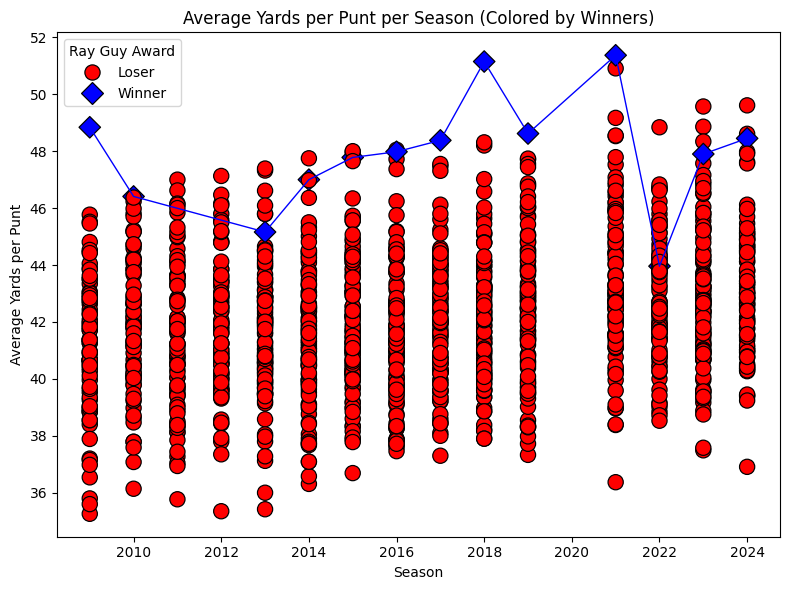

In [ ]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data = new_data,
    x = 'Season',
    y = 'Average',
    hue = 'Winner',
    style = 'Winner',
    palette = {0: 'red', 1: 'blue'},
    markers = {0: 'o', 1: 'D'},
    s = 120,
    edgecolor = 'black'
)

winners = new_data[new_data['Winner'] == 1].sort_values('Season')

plt.plot(
    winners['Season'],
    winners['Average'],
    color = 'blue',
    linewidth = 1,
    marker = None
)

plt.title('Average Yards per Punt per Season (Colored by Winners)')
plt.ylabel('Average Yards per Punt')
plt.xlabel('Season')

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Loser' if label == '0' else 'Winner' for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Ray Guy Award')

plt.tight_layout()
plt.show()

### Restricting Data to only Punters that average 42+ yards per punt

In [ ]:
new_data = new_data[new_data['Average'] >= 42]

#### I checked the data for outliers and determined whether to remove them, as their presence could skew the results. I created a graph to visualize the minimum number of punts required to be considered a candidate for the Ray Guy Award. I based it on the previous winners and excluded punters who punted fewer than 40 times per season. I also did the same for average yards per punt, restricting the data to punters with an average greater than 42 yards.


### Acessing The Number of Touchbacks

<Axes: xlabel='Touchbacks', ylabel='Count'>

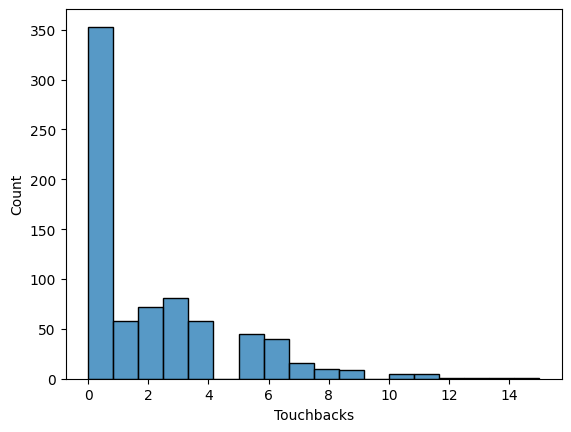

In [ ]:
sns.histplot(x = 'Touchbacks', data = new_data)

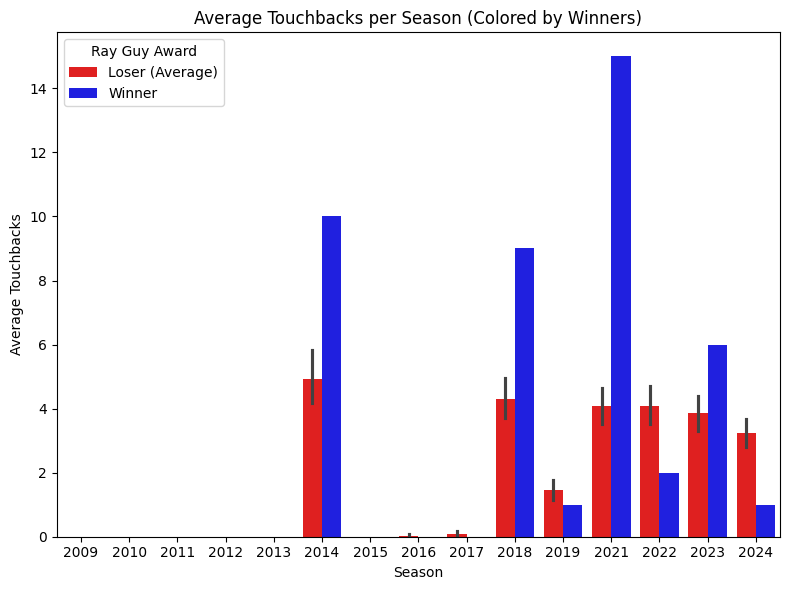

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data = new_data,
    x = 'Season',
    y = 'Touchbacks',
    hue = 'Winner',
    palette = {0: 'red', 1: 'blue'}
)
plt.title('Average Touchbacks per Season (Colored by Winners)')
plt.ylabel('Average Touchbacks')
plt.xlabel('Season')

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Loser (Average)' if label == '0' else 'Winner' for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Ray Guy Award')

plt.tight_layout()
plt.show()

#### I created a histogram to determine if there are any outliers in the number of touchbacks. I also made a plot to analyze the average number of touchbacks, comparing Ray Guy Award winners with non-winners and assessing the predictive value of this metric. According to the graph, most winners have higher averages, indicating that it is a valuable predictor.


# **Data Visualization**

### Ray Guy award winners by College

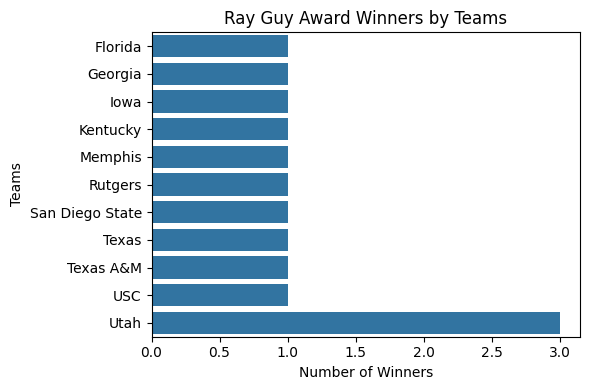

In [ ]:
team_winners = (new_data.groupby("Team")['Winner'].sum().reset_index())

team_winners = team_winners[team_winners['Winner'] > 0]

fig, axes = plt.subplots(figsize=(6,4))
sns.barplot(x='Winner', y='Team', data=team_winners)
axes.set_xlabel("Number of Winners")
axes.set_ylabel("Teams")
axes.set_title("Ray Guy Award Winners by Teams")
plt.tight_layout()

### Ray Guy award winners by Conference

Text(0.5, 1.0, 'Ray Guy Award Winners by Conference')

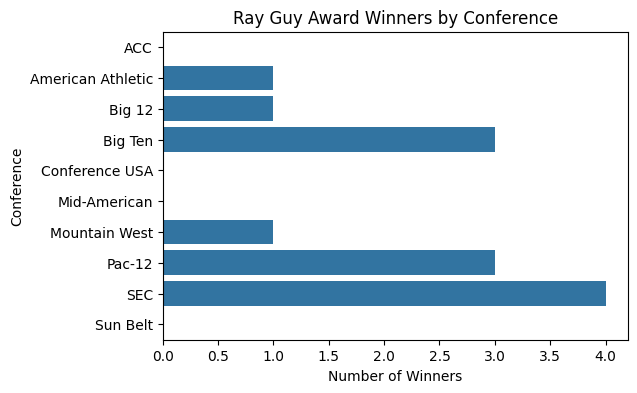

In [ ]:
conference_winners = new_data.groupby("Conference")['Winner'].sum().reset_index()

fig, axes = plt.subplots(figsize=(6,4))
sns.barplot(x = 'Winner', y = 'Conference', data = conference_winners)
axes.set_xlabel("Number of Winners")
axes.set_ylabel("Conference")
axes.set_title("Ray Guy Award Winners by Conference")

#### I created two visualizations to determine if there was any bias in the voting. Regarding whether only specific colleges and conferences win the Ray Guy award. Although the data is sparse, both plots show no bias, as they appear random.


### Ray Guy Award Winners by their Percentage of Punts Inside the 20

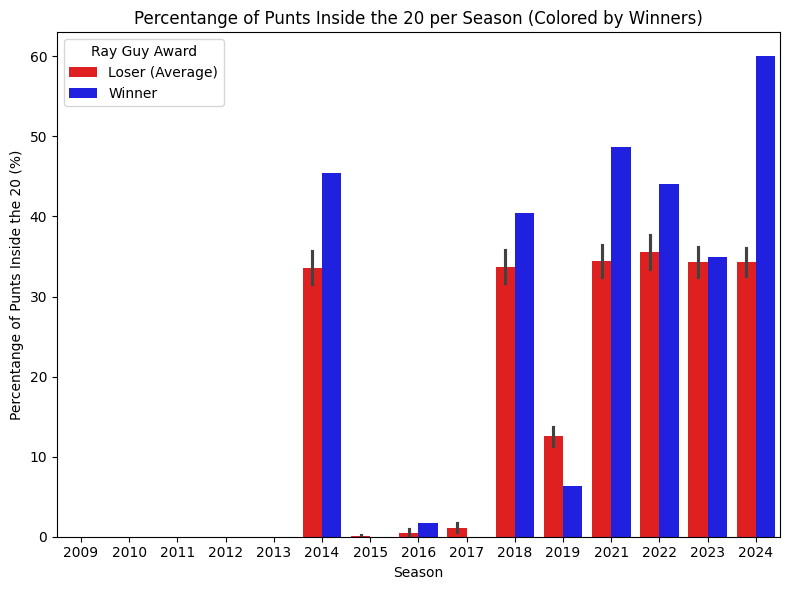

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data = new_data,
    y ='Percentage_Inside_20',
    x ='Season',
    hue='Winner',
    palette={0: 'red', 1: 'blue'})

plt.title('Percentange of Punts Inside the 20 per Season (Colored by Winners)')
plt.ylabel('Percentange of Punts Inside the 20 (%)')
plt.xlabel('Season')

handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['Loser (Average)' if label == '0' else 'Winner' for label in labels]
plt.legend(handles=handles, labels=new_labels, title='Ray Guy Award')

plt.tight_layout()
plt.show()

#### According to the graph above, the percentage of punts inside the 20-yard line is a significant predictor of the Ray Guy Award, as almost all winners have a higher percentage rate than the average. Therefore, to be considered a good candidate for the Ray Guy award, a punter must be able to punt the ball inside the 20-yard line consistently.

### Correlation Matrix

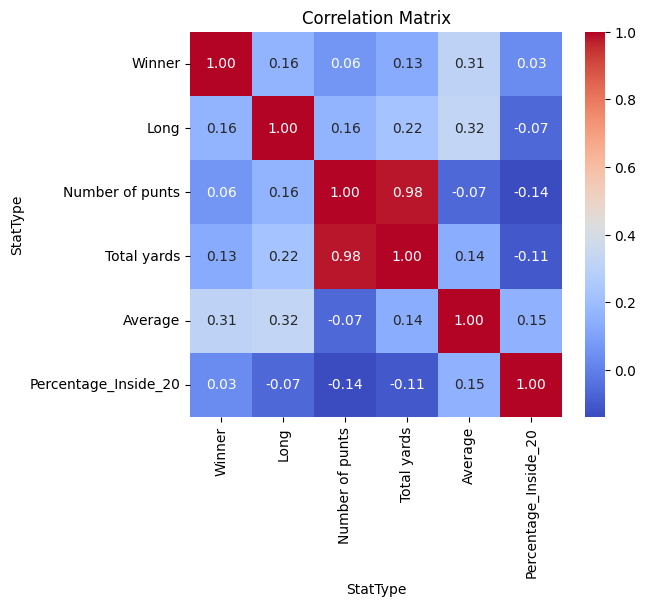

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

data_subset = new_data[['Winner', 'Long',	'Number of punts',	'Total yards',	'Average',	'Percentage_Inside_20']]

plt.figure(figsize=(6, 5))
sns.heatmap(data_subset.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### The correlation matrix shows no strong relationships among the selected statistics. The highest correlation observed is with average, at 0.31, which is still considered weak. However, these results should be interpreted with caution because the dataset is small and includes only a limited number of Ray Guy Award winners, which may reduce the reliability of the correlations.

# Machine Learning
## Logistic Regression (Baseline)

In [ ]:
from sklearn.model_selection import train_test_split
x = new_data[['Average', 'Percentage_Inside_20']]
y = new_data['Winner']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, \
    roc_auc_score, roc_curve, precision_recall_curve

model = LogisticRegression(class_weight = 'balanced', random_state = 85)
model.fit(x_train, y_train)

lr_preds = model.predict(x_test)
lr_probs = model.predict_proba(x_test)

dict_accuracy = {
    'Accuracy': round(model.score(x_test, y_test), 4),
    'Recall': round(recall_score(y_test, lr_preds), 4),
    'Precision': round(precision_score(y_test, lr_preds), 4),
    'ROC AUC': round(roc_auc_score(y_test, lr_probs[:, 1]), 4)
}
display(dict_accuracy)

{'Accuracy': 0.8502,
 'Recall': 0.8,
 'Precision': 0.1081,
 'ROC AUC': np.float64(0.9149)}

#### I developed a machine learning model to test the hypothesis that consistency, measured by average yards per punt and percentage of punts inside the 20-yard line, is a defining trait of elite collegiate punters. I used logistic regression as a baseline model because the response variable (award winner) is binary. The data were split into training and test sets (70/30) to evaluate model performance and reduce overfitting.

#### The results show high accuracy, strong recall, and an excellent ROC AUC, but low precision. This suggests that the model is effective at identifying most actual winners (high recall) and performs well overall at distinguishing winners from non-winners (high ROC AUC). However, the low precision indicates the model frequently predicts a player will win when they do not.

#### While precision appears low, this may partly reflect the difficulty of the task and the rarity of award winners. In practice, some of the “false positives” may still represent elite punters or award finalists, which means the model is identifying high-level performance even if it does not perfectly predict the final winner.


#### Detecting Overfitting (?)

In [ ]:
cm = confusion_matrix(y_test, lr_preds)

labels = np.unique(y_test)
cm_df = pd.DataFrame(cm, index=[f"Actual {l}" for l in labels], columns=[f"Predicted {l}" for l in labels])

# Add totals for correct/incorrect
cm_df['Correct'] = np.diag(cm_df)  # diagonal is correct
cm_df['Incorrect'] = cm_df.sum(axis=1) - np.diag(cm_df)

print(cm_df)

          Predicted 0  Predicted 1  Correct  Incorrect
Actual 0          189           33      189        222
Actual 1            1            4        4          5


#### Checking which players were labled incorrectly

In [ ]:
incorrect_mask = y_test != lr_preds

incorrect_indices = y_test.index[incorrect_mask]
incorrect_people = new_data.loc[incorrect_indices]


incorrect_people = incorrect_people.copy()
incorrect_people['True_Label'] = y_test[incorrect_mask]
incorrect_people['Predicted_Label'] = lr_preds[incorrect_mask]

incorrect_people

StatType,Season,PlayerId,Player,Team,Conference,Inside 20,Long,Number of punts,Total yards,Touchbacks,Average,Percentage_Inside_20,Winner,True_Label,Predicted_Label
3526,2023,4608820,Ryan Rehkow,BYU,Big 12,25.0,70.0,68.0,3287.0,5.0,48.34,36.76,0,0,1
2667,2019,4429728,John Haggerty,Western Kentucky,Conference USA,6.0,64.0,42.0,1941.0,0.0,46.21,14.29,0,0,1
2728,2021,4244814,Jake Julien,Eastern Michigan,Mid-American,10.0,78.0,46.0,2111.0,5.0,45.89,21.74,0,0,1
719,2012,517405,Josh Hubner,Arizona State,Pac-12,0.0,73.0,52.0,2451.0,0.0,47.13,0.00,0,0,1
3539,2023,4685082,Lachlan Wilson,California,Pac-12,15.0,73.0,47.0,2141.0,2.0,45.55,31.91,0,0,1
3247,2022,4705853,Eddie Czaplicki,Arizona State,Pac-12,15.0,75.0,50.0,2299.0,5.0,45.98,30.00,0,0,1
3651,2023,4880048,James Burnip,Alabama,SEC,17.0,67.0,50.0,2358.0,7.0,47.16,34.00,0,0,1
3501,2023,4571597,Matthew Hayball,Vanderbilt,SEC,25.0,71.0,58.0,2759.0,4.0,47.57,43.10,0,0,1
3069,2022,4393519,Bryce Baringer,Michigan State,Big Ten,23.0,72.0,51.0,2491.0,4.0,48.84,45.10,0,0,1
3188,2022,4686889,Tory Taylor,Iowa,Big Ten,32.0,70.0,74.0,3339.0,11.0,45.12,43.24,0,0,1


#### Comparing the players that were predicted incorrectly vs correctly

In [ ]:
import pandas as pd

new_data_test_subset = new_data.loc[y_test.index].copy()

correct_mask = y_test == lr_preds
incorrect_mask = y_test != lr_preds

correct_players = new_data_test_subset[correct_mask].copy()
incorrect_players = new_data_test_subset[incorrect_mask].copy()

correct_players['True_Label'] = y_test[correct_mask]
correct_players['Predicted_Label'] = lr_preds[correct_mask.values]

incorrect_players['True_Label'] = y_test[incorrect_mask]
incorrect_players['Predicted_Label'] = lr_preds[incorrect_mask.values]

**Comparing summary statistics**

In [ ]:
print("Correctly classified players summary:")
correct = correct_players.describe()
correct.loc[['count', 'mean', 'min', 'max']]

Correctly classified players summary:


StatType,Season,PlayerId,Inside 20,Long,Number of punts,Total yards,Touchbacks,Average,Percentage_Inside_20,Winner,True_Label,Predicted_Label
count,193.000000,1.930000e+02,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,2017.611399,2.953945e+06,8.979275,65.290155,56.031088,2448.948187,1.787565,43.710259,16.396684,0.020725,0.020725,0.020725
min,2009.000000,1.836790e+05,0.000000,52.000000,40.000000,1688.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,5.231029e+06,27.000000,85.000000,95.000000,3993.000000,9.000000,51.150000,50.940000,1.000000,1.000000,1.000000


In [ ]:
print("Incorrectly classified players summary:")
incorrect = incorrect_players.describe()
incorrect.loc[['count', 'mean', 'min', 'max']]

Incorrectly classified players summary:


StatType,Season,PlayerId,Inside 20,Long,Number of punts,Total yards,Touchbacks,Average,Percentage_Inside_20,Winner,True_Label,Predicted_Label
count,34.000000,3.400000e+01,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,2019.647059,3.660679e+06,14.382353,71.029412,55.823529,2615.411765,4.088235,46.883235,26.082059,0.029412,0.029412,0.970588
min,2010.000000,3.799350e+05,0.000000,60.000000,41.000000,1941.000000,0.000000,45.120000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,5.154245e+06,32.000000,79.000000,80.000000,3636.000000,13.000000,49.610000,54.170000,1.000000,1.000000,1.000000


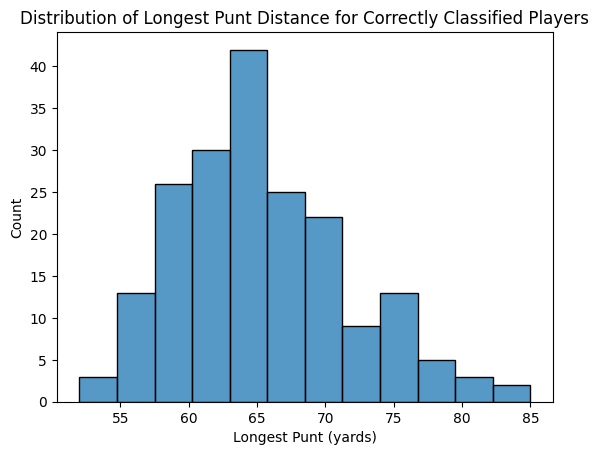

In [ ]:
sns.histplot(correct_players['Long'])
plt.title('Distribution of Longest Punt Distance for Correctly Classified Players')
plt.xlabel('Longest Punt (yards)')
plt.ylabel('Count')
plt.show()

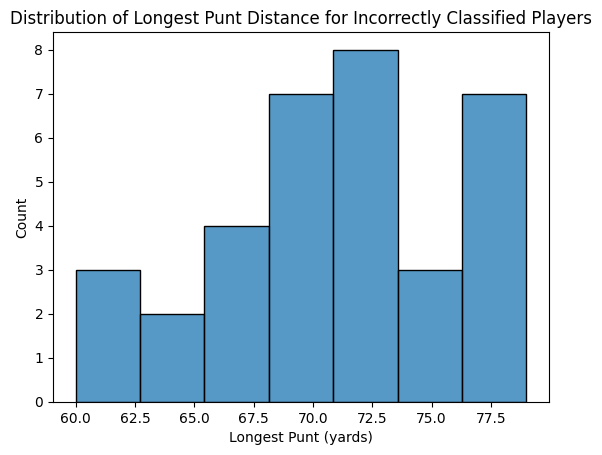

In [ ]:
sns.histplot(incorrect_players['Long'])
plt.title('Distribution of Longest Punt Distance for Incorrectly Classified Players')
plt.xlabel('Longest Punt (yards)')
plt.ylabel('Count')
plt.show()

#### After developing the logistic regression model, I evaluated whether it was overfitting. The results suggest that the model is overfitting, meaning it fits the training data too closely and does not generalize well to new data. To better understand this issue, I examined misclassified punters and found that players with exceptionally long punts were more likely to be misclassified. Supporting this, a comparison of summary statistics showed that the average longest punt among misclassified punters exceeded 70 yards.

#### To further investigate, I created histograms of the longest punt distance for correctly and incorrectly classified players. The distribution for misclassified punters was left-skewed, while the correctly classified group showed a right-skewed distribution, indicating differences in how extreme punt distances relate to model errors.


#### The next model I implemented was k-nearest neighbors (KNN), a simple binary classifier that is more flexible than logistic regression because it does not assume a specific functional form between predictors and the response. KNN is appropriate for this problem because it classifies players based on similarity to nearby observations in the feature space.

#### An important step in building the KNN model was selecting the value of *k*. A larger *k* reduces the influence of noise but may overlook smaller, meaningful patterns in the data, while a smaller *k* can capture local structure but may overfit. A common heuristic is to set k equal to the square root of the sample size, but this value proved too large and smoothed over important distinctions among players. Instead, I performed a grid search and evaluated model performance across multiple k values to determine the optimal choice.

#### Because the dataset is small, I also used bootstrapping to improve the stability of the model evaluation. By repeatedly resampling the data and refitting the KNN model, I obtained more reliable performance estimates and reduced the impact of sample-specific variability.


### K Nearest Neighbors

/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


Best K: 3


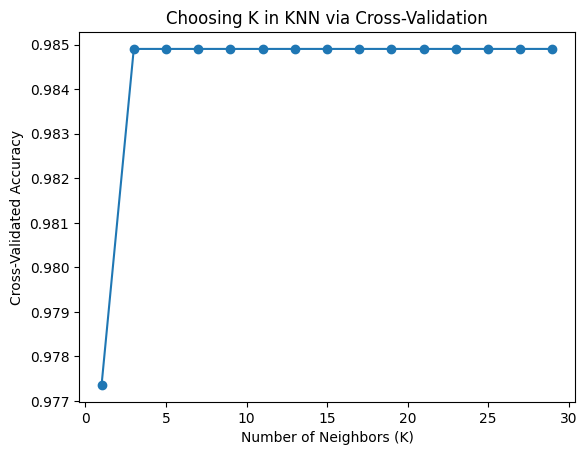

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("knn", KNeighborsClassifier())
])

param_grid = {
    "knn__n_neighbors": np.arange(1, 31, 2)
}
grid = GridSearchCV(
    pipe,
    param_grid,
    cv = 10,
    scoring="accuracy"
)

grid.fit(x_train, y_train)

print("Best K:", grid.best_params_["knn__n_neighbors"])

results = grid.cv_results_

k_vals = results["param_knn__n_neighbors"].data
mean_scores = results["mean_test_score"]

plt.plot(k_vals, mean_scores, marker="o")
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Cross-Validated Accuracy")
plt.title("Choosing K in KNN via Cross-Validation")
plt.show()

### K Nearest Neighbors (BootStrapping)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, mean_squared_error

num_boot = 1000
k = 3
n = len(x_train)

train_accs = []
boot_accuracies = []
boot_recall = []
boot_precision = []
boot_roc_auc = []
boot_rmse = []

for i in range(num_boot):
    bootstrap_indices = np.random.choice(n, n, replace=True)
    oob_indices = np.setdiff1d(np.arange(n), bootstrap_indices)

    if len(oob_indices) == 0:
        continue

    x_boot = x_train.iloc[bootstrap_indices]
    y_boot = y_train.iloc[bootstrap_indices]
    x_oob = x_train.iloc[oob_indices]
    y_oob = y_train.iloc[oob_indices]

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_boot, y_boot)

    train_pred = knn.predict(x_boot)
    train_accs.append(accuracy_score(y_boot, train_pred))

    y_pred = knn.predict(x_oob)
    probs = knn.predict_proba(x_oob)[:, 1]

    boot_accuracies.append(accuracy_score(y_oob, y_pred))
    boot_recall.append(recall_score(y_oob, y_pred, zero_division=0))
    boot_precision.append(precision_score(y_oob, y_pred, zero_division=0))

    if len(np.unique(y_oob)) > 1:
        boot_roc_auc.append(roc_auc_score(y_oob, probs))
    else:
        boot_roc_auc.append(np.nan)

    boot_rmse.append(np.sqrt(mean_squared_error(y_oob, probs)))

train_accs = np.array(train_accs)
boot_accuracies = np.array(boot_accuracies)
boot_recall = np.array(boot_recall)
boot_precision = np.array(boot_precision)
boot_roc_auc = np.array(boot_roc_auc)
boot_rmse = np.array(boot_rmse)

results = {
    'Train Accuracy (mean)': round(train_accs.mean(), 4),
    'OOB Accuracy (mean)': round(boot_accuracies.mean(), 4),
    'Overfitting Difference': round(train_accs.mean() - boot_accuracies.mean(), 4),
    'Recall (mean)': round(boot_recall.mean(), 4),
    'Precision (mean)': round(boot_precision.mean(), 4),
    'ROC AUC (mean)': round(np.nanmean(boot_roc_auc), 4)
}
display(results)

{'Train Accuracy (mean)': np.float64(0.9932),
 'OOB Accuracy (mean)': np.float64(0.9797),
 'Overfitting Difference': np.float64(0.0135),
 'Recall (mean)': np.float64(0.0161),
 'Precision (mean)': np.float64(0.0322),
 'ROC AUC (mean)': np.float64(0.5229)}

#### Checking which players were labled incorrectly

In [ ]:
knn_preds = grid.best_estimator_.predict(x_test)
incorrect_mask = y_test != knn_preds

incorrect_indices = y_test.index[incorrect_mask]
incorrect_people = new_data.loc[incorrect_indices]

incorrect_people = incorrect_people.copy()
incorrect_people['True_Label'] = y_test[incorrect_mask]
incorrect_people['Predicted_Label'] = knn_preds[incorrect_mask]

incorrect_people

StatType,Season,PlayerId,Player,Team,Conference,Inside 20,Long,Number of punts,Total yards,Touchbacks,Average,Percentage_Inside_20,Winner,True_Label,Predicted_Label
1944,2017,3929851,Michael Dickson,Texas,Big 12,0.0,76.0,73.0,3532.0,0.0,48.38,0.00,1,1,0
1256,2015,531022,Tom Hackett,Utah,Pac-12,0.0,76.0,55.0,2628.0,0.0,47.78,0.00,1,1,0
2209,2018,4035239,Braden Mann,Texas A&M,SEC,19.0,82.0,47.0,2404.0,9.0,51.15,40.43,1,1,0
814,2013,503362,Tom Hornsey,Memphis,American Athletic,0.0,79.0,62.0,2800.0,0.0,45.16,0.00,1,1,0


In [ ]:
import pandas as pd

new_data_test_subset = new_data.loc[y_test.index].copy()

correct_mask = y_test == knn_preds
incorrect_mask = y_test != knn_preds

correct_players = new_data_test_subset[correct_mask].copy()
incorrect_players = new_data_test_subset[incorrect_mask].copy()

correct_players['True_Label'] = y_test[correct_mask]
correct_players['Predicted_Label'] = knn_preds[correct_mask.values]

incorrect_players['True_Label'] = y_test[incorrect_mask]
incorrect_players['Predicted_Label'] = knn_preds[incorrect_mask.values]

**Comparing summary statistics**

In [ ]:
print("Correctly classified players summary:")
correct = correct_players.describe(include='all')
correct.loc[['count', 'mean', "min", "max"]]

Correctly classified players summary:


StatType,Season,PlayerId,Player,Team,Conference,Inside 20,Long,Number of punts,Total yards,Touchbacks,Average,Percentage_Inside_20,Winner,True_Label,Predicted_Label
count,223.000000,2.230000e+02,223,223,223,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000,223.000000
mean,2017.955157,3.074328e+06,NaN,NaN,NaN,9.878924,65.932735,55.941704,2467.295964,2.130045,44.114978,17.986188,0.004484,0.004484,0.004484
min,2009.000000,1.836790e+05,NaN,NaN,NaN,0.000000,52.000000,40.000000,1688.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,5.231029e+06,NaN,NaN,NaN,32.000000,85.000000,95.000000,3993.000000,13.000000,49.610000,54.170000,1.000000,1.000000,1.000000


In [ ]:
print("Incorrectly classified players summary:")
incorrect = incorrect_players.describe(include='all')
incorrect.loc[['count','mean', "min", "max"]]

Incorrectly classified players summary:


StatType,Season,PlayerId,Player,Team,Conference,Inside 20,Long,Number of punts,Total yards,Touchbacks,Average,Percentage_Inside_20,Winner,True_Label,Predicted_Label
count,4.00,4.0,4,4,4,4.00,4.00,4.00,4.0,4.00,4.0000,4.0000,4.0,4.0,4.0
mean,2015.75,2249868.5,NaN,NaN,NaN,4.75,78.25,59.25,2841.0,2.25,48.1175,10.1075,1.0,1.0,0.0
min,2013.00,503362.0,NaN,NaN,NaN,0.00,76.00,47.00,2404.0,0.00,45.1600,0.0000,1.0,1.0,0.0
max,2018.00,4035239.0,NaN,NaN,NaN,19.00,82.00,73.00,3532.0,9.00,51.1500,40.4300,1.0,1.0,0.0


#### While KNN provided a slight improvement in precision, it yielded lower recall and ROC AUC than the Logistic Regression baseline. An error analysis of misclassified instances revealed that the *Longest Punt* feature acted as a significant outlier. Specifically, the models struggled with punters who recorded punts exceeding 70 yards; these extreme values appeared to skew the decision boundary, leading both KNN and Logistic Regression to misidentify winners and non-winners based on *flashy* individual plays rather than season-long consistency.


# **Advanced Machine Learning**

#### Since the two initial models did not meet the intended performance standards, I implemented a more advanced machine learning approach. Specifically, I used Gradient Boosting (XGBoost), a state-of-the-art algorithm known for its strong predictive performance in sports analytics. XGBoost is well-suited for structured tabular data and can effectively handle sparsity in predictors. Given the technical complexity of the model, I conducted a grid search with cross-validation to identify optimal hyperparameters. The final model performed well, achieving a low RMSE and high classification accuracy.

### Gradient Boosting (XGBoost)

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score, mean_squared_error

grid = {
    'max_depth': [2, 3, 4, 5],
    'n_estimators': [50, 75, 100],
    'learning_rate': np.linspace(0.01, 0.20, 10),
    'gamma': np.linspace(0.01, 0.20, 10),
    'reg_lambda': np.linspace(0.01, 0.20, 10)
}

XGB_model = xgb.XGBClassifier(random_state = 15)

grid_search = GridSearchCV(estimator = XGB_model, param_grid = grid, scoring = 'neg_mean_squared_error', cv = 5)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
print('Best Parameters:', grid_search.best_params_)

preds = best_model.predict(x_test)
probs = best_model.predict_proba(x_test)

dict_accuracy = {
    'Accuracy': round(best_model.score(x_test, y_test), 4),
    'Recall': round(recall_score(y_test, preds), 4),
    'Precision': round(precision_score(y_test, preds), 4),
    'ROC AUC': round(roc_auc_score(y_test, probs[:, 1]), 4),
    'RMSE': round(np.sqrt(mean_squared_error(y_test, preds)), 4)
}
display(dict_accuracy)

Best Parameters: {'gamma': np.float64(0.01), 'learning_rate': np.float64(0.01), 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': np.float64(0.01)}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Accuracy': 0.978,
 'Recall': 0.0,
 'Precision': 0.0,
 'ROC AUC': np.float64(0.9126),
 'RMSE': np.float64(0.1484)}

#### Detecting Overfitting (?)

In [ ]:
cm = confusion_matrix(y_test, preds)

labels = np.unique(y_test)
cm_df = pd.DataFrame(cm, index=[f"Actual {l}" for l in labels], columns=[f"Predicted {l}" for l in labels])

# Add totals for correct/incorrect
cm_df['Correct'] = np.diag(cm_df)  # diagonal is correct
cm_df['Incorrect'] = cm_df.sum(axis=1) - np.diag(cm_df)

print(cm_df)

          Predicted 0  Predicted 1  Correct  Incorrect
Actual 0          222            0      222        222
Actual 1            5            0        0          5


#### Checking which players were labled incorrectly

In [ ]:
incorrect_mask = y_test != preds

incorrect_indices = y_test.index[incorrect_mask]
incorrect_people = new_data.loc[incorrect_indices]

incorrect_people = incorrect_people.copy()
incorrect_people['True_Label'] = y_test[incorrect_mask]
incorrect_people['Predicted_Label'] = preds[incorrect_mask]

incorrect_people

StatType,Season,PlayerId,Player,Team,Conference,Inside 20,Long,Number of punts,Total yards,Touchbacks,Average,Percentage_Inside_20,Winner,True_Label,Predicted_Label
1944,2017,3929851,Michael Dickson,Texas,Big 12,0.0,76.0,73.0,3532.0,0.0,48.38,0.00,1,1,0
1256,2015,531022,Tom Hackett,Utah,Pac-12,0.0,76.0,55.0,2628.0,0.0,47.78,0.00,1,1,0
2209,2018,4035239,Braden Mann,Texas A&M,SEC,19.0,82.0,47.0,2404.0,9.0,51.15,40.43,1,1,0
104,2009,240428,Drew Butler,Georgia,SEC,0.0,75.0,50.0,2442.0,0.0,48.84,0.00,1,1,0
814,2013,503362,Tom Hornsey,Memphis,American Athletic,0.0,79.0,62.0,2800.0,0.0,45.16,0.00,1,1,0


In [ ]:
import pandas as pd

new_data_test_subset = new_data.loc[y_test.index].copy()

correct_mask = y_test == preds
incorrect_mask = y_test != preds

correct_players = new_data_test_subset[correct_mask].copy()
incorrect_players = new_data_test_subset[incorrect_mask].copy()

correct_players['True_Label'] = y_test[correct_mask]
correct_players['Predicted_Label'] = preds[correct_mask.values]

incorrect_players['True_Label'] = y_test[incorrect_mask]
incorrect_players['Predicted_Label'] = preds[incorrect_mask.values]

**Comparing summary statistics**

In [ ]:
print("Correctly classified players summary:")
correct = correct_players.describe(include='all')
correct.loc[['count', 'mean', "min", "max"]]

Correctly classified players summary:


StatType,Season,PlayerId,Player,Team,Conference,Inside 20,Long,Number of punts,Total yards,Touchbacks,Average,Percentage_Inside_20,Winner,True_Label,Predicted_Label
count,222.000000,222.0,222,222,222,222.000000,222.000000,222.000000,222.00000,222.00000,222.000000,222.000000,222.0,222.0,222.0
mean,2017.995495,3087093.0,NaN,NaN,NaN,9.923423,65.891892,55.968468,2467.40991,2.13964,44.093694,18.067207,0.0,0.0,0.0
min,2009.000000,183679.0,NaN,NaN,NaN,0.000000,52.000000,40.000000,1688.00000,0.00000,42.000000,0.000000,0.0,0.0,0.0
max,2024.000000,5231029.0,NaN,NaN,NaN,32.000000,85.000000,95.000000,3993.00000,13.00000,49.610000,54.170000,0.0,0.0,0.0


In [ ]:
print("Incorrectly classified players summary:")
incorrect = incorrect_players.describe(include='all')
incorrect.loc[['count','mean', "min", "max"]]

Incorrectly classified players summary:


StatType,Season,PlayerId,Player,Team,Conference,Inside 20,Long,Number of punts,Total yards,Touchbacks,Average,Percentage_Inside_20,Winner,True_Label,Predicted_Label
count,5.0,5.0,5,5,5,5.0,5.0,5.0,5.0,5.0,5.000,5.000,5.0,5.0,5.0
mean,2014.4,1847980.4,NaN,NaN,NaN,3.8,77.6,57.4,2761.2,1.8,48.262,8.086,1.0,1.0,0.0
min,2009.0,240428.0,NaN,NaN,NaN,0.0,75.0,47.0,2404.0,0.0,45.160,0.000,1.0,1.0,0.0
max,2018.0,4035239.0,NaN,NaN,NaN,19.0,82.0,73.0,3532.0,9.0,51.150,40.430,1.0,1.0,0.0


#### I then evaluated whether the model was overfitting, as with the previous models, and the results indicate that it was. I also analyzed the misclassified observations and found a consistent pattern across models: the longest punt appears to be an outlier in predictions of Ray Guy Award winners. To assess its impact, I removed the longest-punt statistic and refitted the model. Surprisingly, the same punters were still misclassified.


### Gradient Boosting (XGBoost) Without Stat Long

In [ ]:
no_long_data = new_data.drop(columns=['Long'])

x = no_long_data[['Average', 'Percentage_Inside_20']]
y = no_long_data['Winner']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

grid = {
    'max_depth': [2, 3, 4, 5],
    'n_estimators': [50, 75, 100],
    'learning_rate': np.linspace(0.01, 0.20, 10),
    'gamma': np.linspace(0.01, 0.20, 10),
    'reg_lambda': np.linspace(0.01, 0.20, 10)
}

XGB_model = xgb.XGBClassifier(random_state = 15)

grid_search = GridSearchCV(estimator = XGB_model, param_grid = grid, scoring = 'neg_mean_squared_error', cv = 5)
grid_search.fit(x_train, y_train)

best_model = grid_search.best_estimator_
print('Best Parameters:', grid_search.best_params_)

preds = best_model.predict(x_test)
probs = best_model.predict_proba(x_test)

dict_accuracy = {
    'Accuracy': round(best_model.score(x_test, y_test), 4),
    'Recall': round(recall_score(y_test, preds), 4),
    'Precision': round(precision_score(y_test, preds), 4),
    'ROC AUC': round(roc_auc_score(y_test, probs[:, 1]), 4),
    'RMSE': round(np.sqrt(mean_squared_error(y_test, preds)), 4)
}
display(dict_accuracy)

Best Parameters: {'gamma': np.float64(0.01), 'learning_rate': np.float64(0.01), 'max_depth': 2, 'n_estimators': 50, 'reg_lambda': np.float64(0.01)}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


{'Accuracy': 0.978,
 'Recall': 0.0,
 'Precision': 0.0,
 'ROC AUC': np.float64(0.9126),
 'RMSE': np.float64(0.1484)}

#### Checking which players were labled incorrectly

In [ ]:
incorrect_mask = y_test != preds

incorrect_indices = y_test.index[incorrect_mask]
incorrect_people = no_long_data.loc[incorrect_indices]

incorrect_people = incorrect_people.copy()
incorrect_people['True_Label'] = y_test[incorrect_mask]
incorrect_people['Predicted_Label'] = preds[incorrect_mask]

incorrect_people

StatType,Season,PlayerId,Player,Team,Conference,Inside 20,Number of punts,Total yards,Touchbacks,Average,Percentage_Inside_20,Winner,True_Label,Predicted_Label
1944,2017,3929851,Michael Dickson,Texas,Big 12,0.0,73.0,3532.0,0.0,48.38,0.00,1,1,0
1256,2015,531022,Tom Hackett,Utah,Pac-12,0.0,55.0,2628.0,0.0,47.78,0.00,1,1,0
2209,2018,4035239,Braden Mann,Texas A&M,SEC,19.0,47.0,2404.0,9.0,51.15,40.43,1,1,0
104,2009,240428,Drew Butler,Georgia,SEC,0.0,50.0,2442.0,0.0,48.84,0.00,1,1,0
814,2013,503362,Tom Hornsey,Memphis,American Athletic,0.0,62.0,2800.0,0.0,45.16,0.00,1,1,0


**Comparing summary statistics**

In [ ]:
print("Correctly classified players summary:")
correct = correct_players.describe(include='all')
correct.loc[['count', 'mean', "min", "max"]]

Correctly classified players summary:


StatType,Season,PlayerId,Player,Team,Conference,Inside 20,Long,Number of punts,Total yards,Touchbacks,Average,Percentage_Inside_20,Winner,True_Label,Predicted_Label
count,222.000000,222.0,222,222,222,222.000000,222.000000,222.000000,222.00000,222.00000,222.000000,222.000000,222.0,222.0,222.0
mean,2017.995495,3087093.0,NaN,NaN,NaN,9.923423,65.891892,55.968468,2467.40991,2.13964,44.093694,18.067207,0.0,0.0,0.0
min,2009.000000,183679.0,NaN,NaN,NaN,0.000000,52.000000,40.000000,1688.00000,0.00000,42.000000,0.000000,0.0,0.0,0.0
max,2024.000000,5231029.0,NaN,NaN,NaN,32.000000,85.000000,95.000000,3993.00000,13.00000,49.610000,54.170000,0.0,0.0,0.0


In [ ]:
print("Incorrectly classified players summary:")
incorrect = incorrect_players.describe(include='all')
incorrect.loc[['count','mean', "min", "max"]]

Incorrectly classified players summary:


StatType,Season,PlayerId,Player,Team,Conference,Inside 20,Long,Number of punts,Total yards,Touchbacks,Average,Percentage_Inside_20,Winner,True_Label,Predicted_Label
count,5.0,5.0,5,5,5,5.0,5.0,5.0,5.0,5.0,5.000,5.000,5.0,5.0,5.0
mean,2014.4,1847980.4,NaN,NaN,NaN,3.8,77.6,57.4,2761.2,1.8,48.262,8.086,1.0,1.0,0.0
min,2009.0,240428.0,NaN,NaN,NaN,0.0,75.0,47.0,2404.0,0.0,45.160,0.000,1.0,1.0,0.0
max,2018.0,4035239.0,NaN,NaN,NaN,19.0,82.0,73.0,3532.0,9.0,51.150,40.430,1.0,1.0,0.0


#### Despite these misclassifications, my hypothesis is supported, as the average percentage of punts inside the 20-yard line was significantly lower among misclassified punters than among correctly classified ones. This suggests that success is driven more by consistency, specifically, average yards per punt and percentage of punts inside the 20-yard line, which is the defining trait of elite collegiate punters, rather than by extreme values.


# Determining if the Ray Guy Award winners are in the top ten punters

### Punter Score

In [ ]:
from sklearn.preprocessing import StandardScaler

features = [
    'Average',
    'Percentage_Inside_20',
    'Long',
    'Touchbacks'
]

X = new_data[features].copy()

# Invert touchbacks (lower is better)
X['Touchbacks'] = -X['Touchbacks']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(X_scaled, columns = features, index = new_data.index)

In [ ]:
new_data['Punter_Score'] = scaled_df.mean(axis=1)

## The top 10 punters per season

#### To further support my hypothesis, I identified the top ten punters each season and examined whether they included the Ray Guy Award winners. Punters were ranked using scaled performance metrics, with the number of touchbacks inverted since lower values indicate better performance. Rankings were then grouped by season to ensure a fair year-to-year comparison.

In [ ]:
top_10_per_season = (
    new_data
    .sort_values(['Season', 'Punter_Score'], ascending=[True, False])
    .groupby('Season')
    .head(10)
)

Did Ray Guy winners typically appear in the top 10?

In [ ]:
top_10_hit_rate = (
    top_10_per_season
    .groupby('Season')['Winner']
    .max()
    .mean()
)

round(top_10_hit_rate, 4)

np.float64(0.8)

~1.0 → winners are almost always top-10 by the stats

~0.5 → stats explain part of voting

<0.3 → voters value something else (team success, hype, TV exposure)

#### After computing the top ten punters for each season, I evaluated whether the Ray Guy Award winner appeared in this group. The results show that award winners were almost always ranked within the top ten, providing additional evidence that consistency-based performance metrics are strongly associated with elite punting performance.

### Are winners statistically different from non-winners?

#### Next, I examined whether the statistics of award winners differed significantly from those of non-winners. Overall, the results indicate little separation between the two groups. Among the variables considered, the primary measures were average yards per punt, percentage of punts inside the 20-yard line, and longest punt. The longest punt metric appears to reflect isolated peak performance rather than season-long consistency and therefore behaves more like an outlier in the context of award prediction. As a result, average yards per punt and percentage of punts inside the 20 emerge as the most meaningful indicators of elite performance.

In [ ]:
winner_stats = new_data[new_data['Winner'] == 1][features]
non_winner_stats = new_data[new_data['Winner'] == 0][features]

winner_stats.mean() - non_winner_stats.mean()

,0
StatType,
Average,3.937909
Percentage_Inside_20,4.106576
Long,7.613521
Touchbacks,1.325396


### Rankings of what actually matters

#### To further support this conclusion, I developed a function to statistically evaluate the relative importance of each metric in the rankings. The results show that average yards per punt has the strongest influence, suggesting that sustained consistency throughout the season is a key factor in winning the Ray Guy Award.

In [ ]:
def cohens_d(a, b):
    return (a.mean() - b.mean()) / np.sqrt((a.var() + b.var()) / 2)

effect_sizes = {
    col: cohens_d(winner_stats[col], non_winner_stats[col])
    for col in features
}


dict_effect_sizes = {
    'Average': round(effect_sizes['Average'], 4),
    'Percentage_Inside_20': round(effect_sizes['Percentage_Inside_20'], 4),
    'Long': round(effect_sizes['Long'], 4),
    'Touchbacks': round(effect_sizes['Touchbacks'], 4)
}

display(dict_effect_sizes)

{'Average': np.float64(2.156),
 'Percentage_Inside_20': np.float64(0.1978),
 'Long': np.float64(1.1939),
 'Touchbacks': np.float64(0.3334)}

How to interpret:

~ > 0.8 → strong influence

0.5–0.8 → moderate

< 0.3 → weak